# RS Metrics

RS Metrics MetalSignals Copper provides data on satellite imagery-based trends and estimates of global copper production and storage. The dataset is based on changes in daily, weekly, monthly, and year-over-year estimated growth in raw materials, as well as finished product stored outside at approximately 100 global copper smelters and storage facilities.
https://www.cmegroup.com/market-data/rs-metrics.html

Historical data download
https://datamine.cmegroup.com/#t=p&p=cme.rsMetrics


In this blog, we want to introduce RS Metrics data and illustrate possible relationships between RS Metrics data and CME copper futures data.

A fundamental assumption in our strategy is an INCREASE raw material observed outside of smelters and storages, we can expect INCREASED production and INCREASED supply, which will lead to price DECREASES in the CME Group Copper futures market.

To see if we RS metrics data and futures market changes show any repetitive pattern, we compared long-term and short-term average of raw material observed and we tracked the futures price changes in 4 weeks of the each comparison date.


In [129]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')

%matplotlib inline
warnings.filterwarnings("ignore")

## Load and Explore the RS Metric Data 

In [130]:
df_data = pd.read_csv('./data/Base_Metals_Data.csv', encoding='latin1',)
df_data.head()

,Order,Ticker,Type,Name,Location.Type,Smelter.Storage,Metal.Shape,Metal.Type,YearMonthDayUTC,Address,...,Region,Subregion,Latitude,Longitude,DIRECTORY,GMP,Location,Metal,YearMonth,Tot.Area
0,2351,MSS,Shanghai bonded zone,Shanghai bonded zone,Bonded_zone,Storage,ingots/bars,unknown,13JAN01024215,269 Hui Gang Lu,...,NaN,NaN,30.85972,121.88244,IMG_PHR1A_PMS-N_201301010242159_ORT_1857756101...,AB_20160708,Storage,Metal Generals,Jan-13,17917
1,96,MSS,CMST Development 3,CMST Development 3,Aluminum/STORAGE,Storage,ingots/bars/sheets,aluminum,13JAN01024324,"495 Tieshan Road, Baoshan District",...,NaN,NaN,31.39016,121.45346,IMG_PHR1A_P_201301010243244_ORT_2178227101-001...,AB_MSS_20170209,Storage,Aluminum,Jan-13,40182
2,98,MSS,CMST Development 4,CMST Development 4,Zinc/STORAGE,Storage,ingots/bars/sheets,zinc,13JAN01024324,"495 Tieshan Road, Baoshan District",...,NaN,NaN,31.38357,121.45771,IMG_PHR1A_P_201301010243244_ORT_2178227101-001...,AB_MSS_20170209,Storage,Zinc,Jan-13,942
3,100,MSS,CMST Development 5,CMST Development 5,Copper/STORAGE,Storage,ingots/bars/sheets,copper,13JAN01024324,"495 Tieshan Road, Baoshan District",...,NaN,NaN,31.38325,121.45562,IMG_PHR1A_P_201301010243244_ORT_2178227101-001...,AB_MSS_20170209,Storage,Copper,Jan-13,4114
4,171,MSS,SIPG Logistics Metal Storage ( Shanghai )1,SIPG Logistics Metal Storage ( Shanghai )1,Aluminum/Copper/Zinc/STORAGE,Storage,ingots/bars/sheets,aluminum/copper/zinc,13JAN01024324,"240 Anda Road , BaoshanDistrict",...,NaN,NaN,31.36225,121.48766,IMG_PHR1A_P_201301010243244_ORT_2178226101-001...,AB_MSS_20170209,Storage,Metal Generals,Jan-13,48280


There are a number of Columns in the data

In [131]:
df_data.columns

Index(['Order', 'Ticker', 'Type', 'Name', 'Location.Type', 'Smelter.Storage',
       'Metal.Shape', 'Metal.Type', 'YearMonthDayUTC', 'Address', 'City',
       'State', 'Zip', 'Country', 'Employee.Cars', 'Containers', 'Trucks',
       'Tippers', 'Total.Area.Metal.stocks.m2', 'Area.Piles.m2',
       'Area.Concentrate.Bags.m2', 'Area.Cathodes.m2', 'Area.Anodes.m2',
       'Comments', 'Notes', 'Time_Date', 'Time', 'Month', 'Day', 'Year',
       'PrePost', 'DOW', 'Week.End', 'Region', 'Subregion', 'Latitude',
       'Longitude', 'DIRECTORY', 'GMP', 'Location', 'Metal', 'YearMonth',
       'Tot.Area'],
      dtype='object')

In [132]:
df_data.describe()

,Order,Employee.Cars,Containers,Trucks,Tippers,Total.Area.Metal.stocks.m2,Area.Piles.m2,Area.Concentrate.Bags.m2,Area.Cathodes.m2,Area.Anodes.m2,Month,Day,Year,DOW,Week.End,Latitude,Longitude,Tot.Area
count,12356.000000,8681.000000,8681.000000,8681.000000,8680.000000,12356.000000,3738.000000,976.000000,122.000000,75.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000,12356.000000
mean,1847.982357,75.170372,76.036977,5.407211,2.348502,12761.595338,4338.090423,1899.533811,2144.614754,1386.866667,6.699417,15.897378,2015.353674,4.028893,0.288119,23.976696,39.701667,12761.595338
std,2274.563978,131.438360,190.860634,14.243850,7.630697,30982.471150,7888.267416,2990.625240,4689.135541,1424.619905,3.459819,8.842787,1.455906,2.000864,0.452905,29.109421,84.691967,30982.471150
min,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,34.000000,25.000000,45.000000,65.000000,1.000000,1.000000,2013.000000,1.000000,0.000000,-46.590960,-128.694790,14.000000
25%,179.000000,9.000000,3.000000,0.000000,0.000000,2371.000000,795.250000,323.500000,353.000000,497.500000,4.000000,8.000000,2014.000000,2.000000,0.000000,20.832120,-22.029770,2371.000000
50%,539.000000,30.000000,12.000000,2.000000,0.000000,5520.000000,1942.000000,753.000000,1184.500000,985.000000,7.000000,16.000000,2016.000000,4.000000,0.000000,33.049980,51.575450,5520.000000
75%,3302.250000,79.000000,48.000000,6.000000,2.000000,13261.000000,4668.000000,1823.250000,1747.500000,1744.000000,10.000000,24.000000,2017.000000,6.000000,1.000000,43.050270,120.999440,13261.000000
max,7665.000000,2751.000000,2028.000000,345.000000,171.000000,714831.000000,129009.000000,30303.000000,31121.000000,6076.000000,12.000000,31.000000,2017.000000,7.000000,1.000000,69.362090,168.383190,714831.000000


## Initial Modeling 

RS Metrics provides aluminum, zinc, copper data and etc. In this analysis we will use 'metal general' and 'copper' to observe outside of both smelters and storages globally. 

In [133]:
df_data['Metal'].unique()

array(['Metal Generals', 'Aluminum', 'Zinc', 'Copper'], dtype=object)

In [139]:
Metal = ['Copper','Metal Generals']
SmSt = ['Smelter','Storage']

rs_metrics_selected_df = df_data.loc[  (df_data['Metal'].isin(Metal)) 
                          & (df_data['Smelter.Storage'].isin(SmSt)) ]

In [140]:
rs_metrics_selected_df.head()

,Order,Ticker,Type,Name,Location.Type,Smelter.Storage,Metal.Shape,Metal.Type,YearMonthDayUTC,Address,...,Region,Subregion,Latitude,Longitude,DIRECTORY,GMP,Location,Metal,YearMonth,Tot.Area
0,2351,MSS,Shanghai bonded zone,Shanghai bonded zone,Bonded_zone,Storage,ingots/bars,unknown,13JAN01024215,269 Hui Gang Lu,...,NaN,NaN,30.85972,121.88244,IMG_PHR1A_PMS-N_201301010242159_ORT_1857756101...,AB_20160708,Storage,Metal Generals,Jan-13,17917
3,100,MSS,CMST Development 5,CMST Development 5,Copper/STORAGE,Storage,ingots/bars/sheets,copper,13JAN01024324,"495 Tieshan Road, Baoshan District",...,NaN,NaN,31.38325,121.45562,IMG_PHR1A_P_201301010243244_ORT_2178227101-001...,AB_MSS_20170209,Storage,Copper,Jan-13,4114
4,171,MSS,SIPG Logistics Metal Storage ( Shanghai )1,SIPG Logistics Metal Storage ( Shanghai )1,Aluminum/Copper/Zinc/STORAGE,Storage,ingots/bars/sheets,aluminum/copper/zinc,13JAN01024324,"240 Anda Road , BaoshanDistrict",...,NaN,NaN,31.36225,121.48766,IMG_PHR1A_P_201301010243244_ORT_2178226101-001...,AB_MSS_20170209,Storage,Metal Generals,Jan-13,48280
5,173,MSS,SIPG Logistics Metal Storage ( Shanghai )2,SIPG Logistics Metal Storage ( Shanghai )2,Aluminum/Copper/Zinc/STORAGE,Storage,ingots/bars/sheets,aluminum/copper/zinc,13JAN01024324,"4049 Jungong Road , Boashan district",...,NaN,NaN,31.34724,121.51265,IMG_PHR1A_P_201301010243244_ORT_2178226101-001...,AB_MSS_20170209,Storage,Metal Generals,Jan-13,6525
6,175,MSS,Shanghai Beijiao Railway,Shanghai Beijiao Railway,Aluminum/Copper/Zinc/STORAGE,Storage,ingots/bars/sheets,aluminum/copper/zinc,13JAN01024324,3501 Gonghexin Road,...,NaN,NaN,31.30470,121.45550,IMG_PHR1A_P_201301010243244_ORT_2178225101-001...,AB_MSS_20170209,Storage,Metal Generals,Jan-13,9709


### Data Resampling

To support our analysis, we will convert the observations for Tot.Area which are generally daily, into a weekly average. This should help smooth variability in observation measurements.  This is an area that could be extensively explored to optimize handling of daily measurement variablity into aggregates that provide insights about the storage levels of these metals.  

RS Metrics measurment date is contained in the 'Notes' column. We will convert that to a proper time series as well as give it a more descriptive column name of 'ObservationDate'


In [141]:
#RS Metrics measurment data is contained in the 'Notes' column; we will convert that to a proper time series
rs_metrics_selected_df.loc[:,'Notes'] = pd.to_datetime(rs_metrics_selected_df.loc[:,'Notes'])
rs_metrics_selected_df.rename(columns={'Notes':'ObservationDate'}, inplace=True)

#Limit to only columns we are interested in at this point.
rs_metrics_final_df = rs_metrics_selected_df[['Tot.Area','ObservationDate']]
rs_metrics_selected_df.set_index('ObservationDate',inplace=True)

In [142]:
#resampling to 
rs_metrics_area_df= pd.DataFrame(rs_metrics_selected_df['Tot.Area'].resample('W').mean())
rs_metrics_area_df.replace(0,np.nan, inplace=True)
rs_metrics_area_df.head()

,Tot.Area
ObservationDate,
2013-01-06,21549.230769
2013-01-13,11711.444444
2013-01-20,19983.000000
2013-01-27,23015.666667
2013-02-03,9360.000000


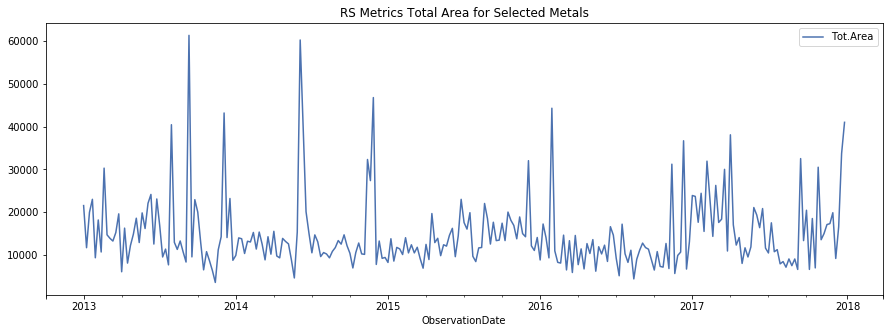

In [144]:
rs_metrics_area_df.plot(figsize=[15,5], title='RS Metrics Total Area for Selected Metals');

## Load CME Copper Future Settlements Prices

We will load the Copper Future Settlement Prices for the first nearby contract month and convert those into weekly average prices to align with the RS Metrics data.

In [145]:
settlements_df = pd.read_csv('./data/copperprice.csv', index_col='date', parse_dates=True )

In [146]:
settlements_df = settlements_df.resample('W').mean()
settlements_df.head()

,copper 1st nb
date,
2013-01-06,3.7155
2013-01-13,3.6767
2013-01-20,3.6438
2013-01-27,3.6795
2013-02-03,3.7239


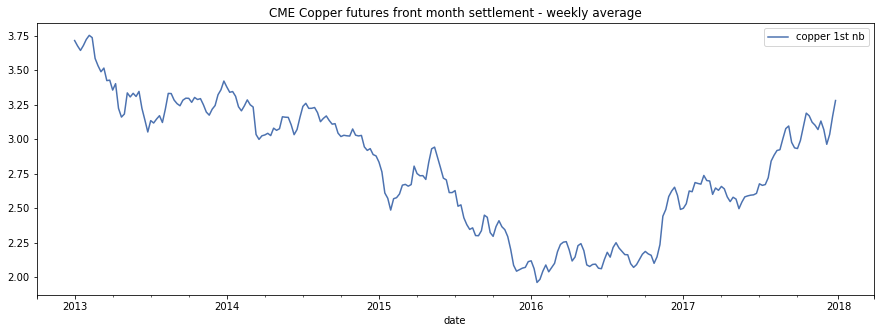

In [147]:
settlements_df.plot(figsize=[15,5], title='CME Copper futures front month settlement - weekly average');

## RS Metrics and CME Copper Settlements Insights
 
In this section we will bring the two data sets together and illustrate the relationship between RS Metric supply indicator of Total Area relative to CME Copper pricing for the first month. As a reminder, Total Area represents the amount of metal observed outside of metal processing facilities and we assume that increased metals detected at metal facilities should result in increase supply and that should have a downward pressure on Copper prices (and vice versa for less supply)

In [150]:
# combined RS Metrics data and price data
final_df  = pd.merge(rs_metrics_area_df, settlements_df,how='outer', left_index=True, right_index=True)
# filling empty cells with the last available value
final_df['Tot.Area'] = final_df['Tot.Area'].fillna(method='ffill')
final_df.head()

,Tot.Area,copper 1st nb
ObservationDate,,
2013-01-06,21549.230769,3.7155
2013-01-13,11711.444444,3.6767
2013-01-20,19983.000000,3.6438
2013-01-27,23015.666667,3.6795
2013-02-03,9360.000000,3.7239


We will compare long-term rolling average (24 weeks) and short-term rolling average (11 weeks) in the analysis.

In [154]:
# calculate 24 week rolling average
final_df['long_term_avg'] = final_df['Tot.Area'].rolling(window=24, min_periods=1).mean()
# calculate 11 week rolling average
final_df['short_term_avg'] = final_df['Tot.Area'].rolling(window=11, min_periods=1).mean()
# calculate the difference between short and long term average values.
final_df['short-long'] = final_df['short_term_avg'] - final_df['long_term_avg']

In [155]:
#Set a threshold to ensure that crossover is reasonable occuring
threshold = 0.03


We will track what the copper futures price is going to be in 4 weeks when we have significant RS Metrics value changes(changed more than the threshold value) 


In [159]:
# simulate tracking copper prices in 4 weeks forward by moving the fourth week value backwards to 
# the current RS Metric value.
final_df['fprice'] = final_df['copper 1st nb'].shift(-4)
final_df['fprice'] = final_df['fprice'].fillna(method='ffill')
final_df['cprice'] = final_df['copper 1st nb'].fillna(method='ffill')

#Caluculate Price Change for 4 weeks from the current date.
final_df['p_change'] = final_df['fprice'] - final_df['cprice']

#Determine direction of RS Moving Average value change.
final_df['r_move'] = final_df['short-long']/abs(final_df['short-long'])
final_df['p_move'] = final_df['p_change']/abs(final_df['p_change'])

# returns 1 if price and rs data move to opposite directions
final_df['check'] = np.where((final_df['r_move']*final_df['p_move'])>0,0,1)
# returns 1 if short-term average moves more than threshold
final_df['threshold'] = np.where( abs(final_df['short-long']) > (final_df['long_term_avg']*threshold) ,1,0)


In [161]:
final_df.head()

,Tot.Area,copper 1st nb,long_term_avg,short_term_avg,short-long,fprice,cprice,p_change,r_move,p_move,check,threshold
ObservationDate,,,,,,,,,,,,
2013-01-06,21549.230769,3.7155,21549.230769,21549.230769,0.0,3.723900,3.7155,0.008400,NaN,1.0,1,0
2013-01-13,11711.444444,3.6767,16630.337607,16630.337607,0.0,3.753100,3.6767,0.076400,NaN,1.0,1,0
2013-01-20,19983.000000,3.6438,17747.891738,17747.891738,0.0,3.736700,3.6438,0.092900,NaN,1.0,1,0
2013-01-27,23015.666667,3.6795,19064.835470,19064.835470,0.0,3.585875,3.6795,-0.093625,NaN,-1.0,1,0
2013-02-03,9360.000000,3.7239,17123.868376,17123.868376,0.0,3.532700,3.7239,-0.191200,NaN,-1.0,1,0


## Final Summary of Strategy Outcomes

 This is the simulated cross over strategy indicating when the Total Area is changing in significant amounts.

### Summary of Over Supply Strategy

Counting days with short-term average higher than long-term average by more than threshold (3%).   This indicates that there is more in storage than the long term average.

In [169]:
# filtering rows with 'short-term average was higher than long-term' & 'the change was greater than 3%'
sel_join = final_df.loc[(final_df['r_move']==1) & (final_df['threshold']==1)]

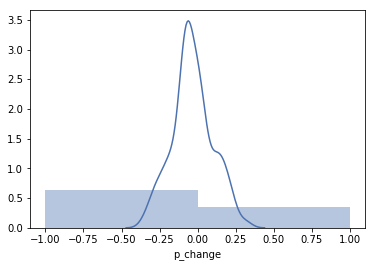

In [170]:
sns.distplot(sel_join['p_change'], bins=2, hist_kws={'range':(-1,1)})

Distribution of price change when the filter above applied

In [171]:
# count number of cases with price moved as expected (i.e. expect price to decrease from the short term oversupply)
sum(n < 0 for n in sel_join['p_change'])

65

In [173]:
# count number of cases with price didn't move as expected (i.e. price didn't decrease in the short term)
sum(n > 0 for n in sel_join['p_change'])


35

When short-term average is higher, supply incease is expected for the near futre which might lead to price drop in the futures market. In the test, 65 out of 100 shows price drop in 4 weeks as postulated.

### Summary of Under Supply Strategy

Counting days with short-term average lower than long-term average by more than threshold(3%).  This indicates less supply being stored than long term average and might represent pressure for higher prices.

In [176]:
# filtering rows with 'short-term average was lower than long-term' & 'the change was greater than 3%'
sel_join = final_df.loc[(final_df['r_move']==-1) & (final_df['threshold']==1)]

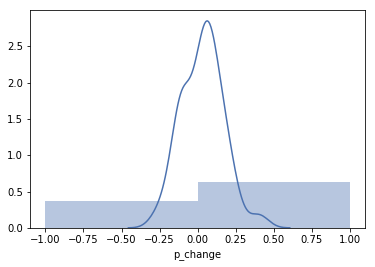

In [177]:
sns.distplot(sel_join['p_change'], bins=2, hist_kws={'range':(-1,1)});

In [181]:
# count number of cases with price moved as expected (i.e. expect price to increase from the short term undersupply)
sum(n > 0 for n in sel_join['p_change'])

71

In [182]:
# count number of cases with price didn't move as expected (i.e. price didn't increase in the short term)
sum(n < 0 for n in sel_join['p_change'])

41

When short-term average is lower, supply decrease is expected for the near futre which might lead to price increase in the futures market. In the test, 71 out of 112 shows price increase in 4 weeks as expected.

## Conclusion

In this analysis, we have tracked copper price changes in 4 weeks when RS Metrics short-term average was higher than long-term average and when it was lower. In both cases, the futures prices moved to the direction we expected based on RS Metrics data at 63-65% of the cases. This example was designed to be simple and straight forward indicating extensive room for additional analysis and understanding.  

